<center><b>SCC0252 - Visualização Computacional
<br>Instituto de Ciências Matemáticas e de Computação - USP</b></center>

<br>

---

<center><h2><b>IMDb Movies:<br/> Uma Visualização Exploratória dos Dados</b></h2></center>

---

**Professora: Maria Cristina** 

**Integrantes:**                                         

- Giovanni W. da Costa. __Nº:__ 10431153
- Heitor Carvalho Pinheiroa. __Nº:__ 11833351

# **Bibliotecas**

In [ ]:
#ignore Warnings

import warnings
warnings.filterwarnings('ignore')

# Linear Algebra

import numpy as np 
import numpy.linalg as linear_algebra
import math

In [ ]:
# DataFrame representation

import pandas as pd

In [ ]:
# Visualisation
!pip install matplotlib -q

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Statistical Models

import statsmodels.api as sm

In [ ]:
import operator
import collections
import copy


In [ ]:
# Parâmetros globais do Pyplot
# Tamanho das figuras

plt.rcParams['figure.figsize'] = [7, 7]

# Tamanho das fontes nos gráficos

plt.rc('font', size = 14)          # controls default text sizes
plt.rc('axes', titlesize = 17)     # fontsize of the axes title
plt.rc('axes', labelsize = 17)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)    # fontsize of the tick labels
plt.rc('legend', fontsize = 16)    # legend fontsize
plt.rc('figure', titlesize = 18)   # fontsize of vthe figure title

suptitle_size = 20

# Funções Auxiliares 

In [ ]:
def moving_average(values, window):

  n = values.shape[0]

  ma = np.zeros(n - window + 1)

  for i in np.arange(0, n - window + 1):
    
    ma[i] = np.mean(values[i: i + window])

  return ma

In [ ]:
def null_duplicated(df):

  duplicates = df.duplicated().sum()
  nulls = df.isnull().sum()

  print(f"Valores duplicados: {duplicates}")
  print(f"\nValores nulos por coluna:\n{nulls}\n")

In [ ]:
def con_year(df):
  
  result = np.zeros(df.shape)
  error_indexs = []

  for i, value in enumerate(df.to_numpy()):
    try:
      result[i] = int(value)    
    except:
      error_indexs.append(i)
      result[i] = None 
  
  return result, error_indexs

In [ ]:
def extrectGenres(df, init = 0):

  distinctGenres = {}

  for genres_i in df['Genre']:
    for genre in  genres_i.split(', '):

      if genre not in distinctGenres:

        distinctGenres[genre] = copy.deepcopy(init)
  
  return distinctGenres.copy()

In [ ]:
def ByGenre(df, col1):

  distinctGenres = extrectGenres(imdb, [])

  for col1, genres in df[[col1, 'Genre']].to_numpy():
    
    genres = genres.split(', ')

    for genre in genres:
      distinctGenres[genre].append(col1)

  return distinctGenres

In [ ]:
def reduceDict(dic, func = 'mean'):

  result = []

  if func == 'mean':

    for key in dic:
      if dic[key] is not []:
        result.append([key, np.mean(dic[key])])

  return np.array(result)

In [ ]:
def meanBy(df, col1, col2):

  by = {}

  for v1, v2 in df[[col1, col2]].to_numpy():
    
    if v1 not in by:
      by[v1] = []
    
    if not np.isnan(v2): 
      by[v1].append(v2)

  mBy = []

  for values in by.values():
    mBy.append(np.mean(values))
  
  return [list(by.keys()), mBy]

# **Objetivos**
1 - Desenvolver uma solução de visualização de dados exploratória para um dos conjuntos de dados sugeridos abaixo, com os recursos de pré processamento e visualização que julgarem apropriados;

2 - As técnicas devem ser adequadas aos dados e às tarefas de visualização/exploração, sendo que vocês devem identificar as tarefas de análise e pré-processamento que desejam apoiar

# **Critérios de Avaliação**

* ##### O relatório associado ao código deve apresentar os dados do grupo, descrever os dados e as tarefas, e justificar as escolhas das técnicas de visualização; certifiquem-se que o Jupyter Notebook consegue executar sem problemas no Google Colab, de maneira sequencial.

# **Sugestões**

* Aproveitem das células de texto em Markdown do Jupyter para ir justificando e descrevendo as visualizações a medida que são geradas para compor o relatório.

* Opcionalmente, a critério do grupo, podem entregar um vídeo de no máximo 5 minutos apresentando a solução de maneira complementar ao relatório (imagine que você está `vendendo´ para um cliente!).

# **Introdução**

## O Dataset

O dataset escolhido para o trabalho em questão foi o **IMDB Movies Dataset**

O IMDb (Internet Movies Database) reune informações sobre filmes, séries de televisão, video-games e conteúdos de streaming. Também inclui informações sobre o elenco, produção e direção entre muitas outras informações.

Em março de 2022 o website contém mais de 10 milhões de títulos.

O dataset usado contém uma lista dos TOP 1000 filmes listados no IMDb, de acordo com o IMDb Rating.





## Dicionário de Variáveis 

*** 

* **Poster_Link** - Link para o poster usado no site do IMDb (Arbitrário)
* **Series_Title** - Nome do filme (Arbitrário)
* **Released_Year** - Ano de lançamento (Discreto)
* **Certificate** - Certificado recebido pelo filme (Ordinal)
* **Runtime** - Duração total do filme (Contínuo)
* **Genre** - Gênero do filme (Categórico)
* **IMDB_Rating** - Score do filme no site do IMDb (Contínuo)
* **Overview** - resumo / sinopse (Arbitrário)
* **Meta_score** - Score recebido pelo filme (Discreto)
* **Director** - Nome do Diretor (Arbitrário)
* **Star1,Star2,Star3,Star4** - Nome das estrelas (Arbitrário)
* **Noofvotes** - Número total de votos (Discreto)
* **Gross** - Dinheiro arrecadado pelo Filme (Contínuo)

***

### Possíveis perguntas a serem respondidas

1. Número de filmes por ano de lançamento. Qual ano lançou mais, qual menos? 
2. Como a média de lançamentos variou ao longo dos anos?
3. Qual a disrtibuição de gênero ao longo dos anos?
4. Existe relação entre o gênero e o Rating?
5. Como o IMDB Rating se relaciona com o Meta score?
6. Existe relação entre o gênero e a arrecadação (gross)?
7. Existe relação entre o IMDb Rating e o Gross?
8. Quais são os diretores que mais produziram filmes?
9. Qual a média do IMDb rating dos filmes produzidos por cada diretor?
10. Existe relação entre o Diretor e o número de votos?
11. Qual a variação do número de votos ao longo dos anos?
12. Existe relação entre o número de votos e o gênero do Filme?
13. Quais os filmes com as maiores arrecadações?
14. Quais as estrelas que mais aparecem ao longo dos anos?
15. Existe relação entre a presença de determinada estrela e o número de votos?
16. Existe relação entre a presença de uma estrela e a arrecadação?
17. Como a arredação dos filmes varia ao longo dos anos?
18. Existe relação entre a presença de um diretor e o Rating?
19. Existe relação entre a presença de um diretor e a arrecadação?
20. Determinadas estrelas tendem a aparecer com determinados diretores?
21. Existe relação entre o Diretor e o Rating?
22. A duração média dos filmes diminuiu ao longo dos anos?
23. Existe relação entre o gênero e a duração do filme?
24. Existe relação entre a duração e o Rating, ou o Meta Score?
25. Existe relação entre a duração e o Gross?


Perguntas opcionais:

26. É possível estimar a arrecadação dos Top 10 filmes para o próximo ano? 


## **1 - Introdução ao Problema**

Ao longo do deste trabalho buscaremos responder algumas questões com base nos dados, tais como:

---

* Número de filmes por ano de lançamento. Qual ano lançou mais, qual menos? 
* Como a média de lançamentos variou ao longo dos anos?
* Qual a disrtibuição de gênero ao longo dos anos?
* Existe relação entre o gênero e o Rating?
* Como o IMDB Rating se relaciona com o Meta score?
* Existe relação entre o gênero e a arrecadação (gross)?

---

Entre outras.


## **2 - Limpeza e pré-processamento dos dados**

In [ ]:
#loading the data

imdb = pd.read_csv("https://raw.githubusercontent.com/Heitorcp/SCC0252-Visualizacao-Computacional/master/datasets/imdb/imdb_top_1000.csv")

poster_links = imdb['Poster_Link']

imdb = imdb.drop(["Poster_Link"], axis = 1)

In [ ]:
column_names = imdb.columns

# Atributos quantitativos
numerical = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Atributos qualitativos 
ordinal = ['Certificate']
categorical = ['Genre']
arbitrary = ['Series_Title', 'Overview', 'Director', 'Star1', 'Star2', 'Star3',	'Star4']

In [ ]:
print("Dimensão dos dados :", imdb.shape)

Dimensão dos dados : (1000, 15)


In [ ]:
imdb.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Verificando a existência de valores nulos ou duplicados

In [ ]:
null_duplicated(imdb)

Valores duplicados: 0

Valores nulos por coluna:
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64



In [ ]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.3+ KB


Precisamos converter as seguintes colunas quantitavias:

  * Released_Year : Int
  * Runtime: Int
  * Gross: Float

In [ ]:
# Convertendo a variável anos para inteiro 

year, erros = con_year(imdb['Released_Year'])

print(f'Erros, na converção:\n')

[print(f"index {i}: {imdb['Series_Title'][966]}") for i in erros]

Erros, na converção:

index 966: Apollo 13


[None]

Como o ano de lançamento do filme Apolo 13 é 1995, substituímos o valor no dataset

In [ ]:
year[966] = 1995

imdb['Released_Year'] = year

In [ ]:
imdb["Runtime"] = imdb["Runtime"].apply(lambda time: time.replace(' min', '')).astype(int)

In [ ]:
imdb["Gross"] = imdb["Gross"].str.replace(",","").astype(float)

## Filmes mais Votados

In [ ]:
movies_Votes = imdb.sort_values(by='No_of_Votes', ascending=False)[:20]

fig = px.bar(movies_Votes,x='Series_Title',y='No_of_Votes',color='Gross',
       hover_name='Released_Year',text='IMDB_Rating',template='plotly_white',
      title='Filmes mais Votados',
      labels = {'No_of_Votes':'Nº de Votos', 'Series_Title':'Título'})

fig.show()

Os filmes mais bem avaliados na plataforma, não necessariamente apresentam maiores arrecadações

## Número de Filmes por Ano

In [ ]:
released_year = imdb['Released_Year'].value_counts().reset_index()

released_year = released_year.iloc[:released_year.shape[0]-1]

released_year = released_year.sort_values(by="index", ascending=True)

released_year.rename(columns={"index":"year", "Released_Year":"count"}, inplace=True)
released_year.reset_index(inplace=True)
released_year.drop(columns=["index"], inplace=True)

filmes_ma = moving_average(released_year['count'], 10)

In [671]:
fig = px.line(released_year, x='year', y="count", title = "Número de Filmes por Ano", color=px.Constant("Nº de Filmes"), template = 'plotly_white',
              labels = {"count":"Nº de Filmes", "year":"Ano"})
fig.add_scatter(x = released_year['year'][9:], y = filmes_ma, name = "MMA(10)")

fig.show()

A linha vermelha no gráfico acima corresponde a uma média móvel para uma janela de 10 anos. 

Podemos perceber que a partir da década de 90, há um crescimento expressivo no número de filmes produzidos anualmente, o que se reflete em um grande crescimento da média.

## Variação do IMDb Rating ao longo dos anos

In [673]:
#calculating the 10 year moving_average for the IMDB Rating

imdb_ratings = imdb[["Released_Year","IMDB_Rating"]].sort_values(by="Released_Year", ascending=True)
imdb_ratings_ma = imdb_ratings["IMDB_Rating"].rolling(window=10, min_periods=10).mean()

#plotting
fig = px.line(imdb_ratings, x='Released_Year', y="IMDB_Rating", title = "IMDb Rating ao longo dos anos", color=px.Constant("Sinal"), template = 'plotly_white',
              labels = {"IMDB_Rating":"IMDb Rating", "Released_Year":"Ano"})
fig.add_scatter(x = imdb_ratings["Released_Year"], y = imdb_ratings_ma, name = "MMA(10)")
fig.update_yaxes(range=[6, 10])

fig.show()

Mesmo o número de filmes ter crescido muito a partir dos anos 90, isso não parece ter comprometido a qualidade das produções, uma vez que o IMDb Rating médio a cada 10 anos se mantém relativamente constante com um valor próximo de 8.0

Vamos verificar se existe alguma tendência entre o valor das avaliações (IMDb Rating) ao longo dos anos

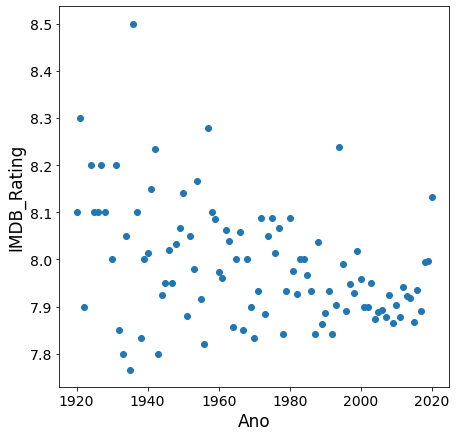

In [ ]:
years, meanRatings = meanBy(imdb, 'Released_Year', 'IMDB_Rating')

plt.plot(years,meanRatings, 'o')

plt.xlabel('Ano')
plt.ylabel('IMDB_Rating')

plt.show()

Percebemos que os valores das avaliações no decorrer dos anos tendem a se acumular ao redor de 7.9, como observamos no gráfico de médias móveis. E, após os anos 2000 o número de filmes com avaliações superiores a 8.0, também parece ter diminuído. 

## Distribuição do gênero ao longo dos anos

A distribuição dos gêneros dos filmes é uma informação importante para entendermos melhor nosso conjunto de dados.

Vamos verificar como os gêneros estão distribuídos

In [ ]:
imdb.Genre.value_counts().reset_index()

,index,Genre
0,Drama,85
1,"Drama, Romance",37
2,"Comedy, Drama",35
3,"Comedy, Drama, Romance",31
4,"Action, Crime, Drama",30
...,...,...
197,"Adventure, Thriller",1
198,"Animation, Action, Sci-Fi",1
199,"Action, Crime, Comedy",1
200,"Animation, Crime, Mystery",1


Podemos perceber que filmes que pertencem exclusivamente ao gênero Drama são os mais frequentes. Porém, muitos filmes são classificados como pertencentes a mais de um gênero. Vamos verficar qual a contagem única de cada gênero no conjunto de dados.

In [ ]:
def extractGenre(lst):
  return list(map(lambda x: x.split(", "), lst))
 
def distinctGenres(lst):

  """
  Returns all distinct genres in the dataset
  """

  distinctGenre = []

  for l in lst:
    for el in l:
      if el in distinctGenre:
        pass
      else:
        distinctGenre.append(el)

  return distinctGenre

def countGenre(df):

  #list with unique genres
  unique_genres = list(imdb.Genre.unique())

  #list with distinct genres
  distinct_genres = distinctGenres(extractGenre(unique_genres))
  
  #creating genre dictionaries with zero key-values
  genre_dict = dict.fromkeys(distinct_genres, 0)

  #counting each genre appearance
  for lst in imdb.Genre.str.split(", "):
    for genre in lst:
      genre_dict[genre] += 1

  #creating a df from the dict 

  genre_df = pd.DataFrame.from_dict(genre_dict, orient='index',
                       columns = ["Count"])

  genre_df = genre_df.sort_values(by="Count", ascending=False)
  genre_df.reset_index(inplace=True)
  genre_df.rename(columns = {"index":"Genre"}, inplace=True)

  #adding a frequency column to the dataframe 

  genre_df["Frequency"] = (round(genre_df["Count"] / genre_df["Count"].sum(),2))

  return genre_df

genre_df = countGenre(imdb)

In [ ]:
from ctypes import alignment
import plotly.graph_objects as go

fig = go.Figure(
    layout = go.Layout(
        title = go.layout.Title(text="Distribuição dos gêneros dos Filmes"),
        template = 'plotly_white'
    )
)

fig.add_trace(go.Bar(
    x=genre_df["Count"],
    y=genre_df["Genre"],
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Genre Count',
    orientation='h'
))

#Labbeling the scatter plot
fig.update_layout(
    margin=dict(l=100, r=10, t=80, b=80)
)

fig.show()

genre_df.head()

,Genre,Count,Frequency
0,Drama,724,0.28
1,Comedy,233,0.09
2,Crime,209,0.08
3,Adventure,196,0.08
4,Action,189,0.07


Sabemos que 724 filmes no dataset possuem o gênero Drama como pelo menos um dos gêneros pelos quais podem ser classificados. Desse modo, pode-se concluir que cerca de 72% dos filmes enquadram-se dentro do gênero Drama.

In [ ]:
distinctGenres = extrectGenres(imdb)

In [ ]:
genreByYear = {}

for year, genres in imdb[['Released_Year', 'Genre']].to_numpy():

  if year not in genreByYear:
    genreByYear[year] = distinctGenres.copy()
  
  genres = genres.split(', ')

  for genre in genres:
    genreByYear[year][genre] += 1


genreByYear = sorted(genreByYear.items(), key=operator.itemgetter(0))
genreByYear = collections.OrderedDict(genreByYear)

In [ ]:
genreByYearList = []

for year in genreByYear:
  for genre in genreByYear[year]:
    genreByYearList.append([year, genre, genreByYear[year][genre]/sum(genreByYear[year].values())])

In [ ]:
genreByYear_df = pd.DataFrame(genreByYearList, columns = ['Year', 'Genre', 'Freq'])
genreByYear_df['Year'] = genreByYear_df['Year'].apply(int)

In [ ]:
fig = px.bar(genreByYear_df,  
             x ="Genre",  
             y ="Freq", 
             animation_frame ='Year',
             range_y=[0,0.5]) 
fig.show()

## Gênero e Rating

### Rating

O IMDB Rating é uma medida computada pela plataforma - que pode variar de 0 a 10 - baseada na avaliação dos usuários. Todos os votos são computados para se fazer o cálculo do IMDb Rating. A plataforma não disponibiliza o método exato de cálculo, porém, eles afirmar que a medida corresponderia a um tipo de média ponderada - isto é, os votos não teriam todos o mesmo impacto no valor final 

In [ ]:
def ratingSummary():

  rating_stats = imdb.IMDB_Rating.describe().reset_index()
  rating_stats.rename(columns = {"index":"statistic"}, inplace=True)

  return rating_stats

ratingSummary()


,statistic,IMDB_Rating
0,count,1000.000000
1,mean,7.949300
2,std,0.275491
3,min,7.600000
4,25%,7.700000
5,50%,7.900000
6,75%,8.100000
7,max,9.300000


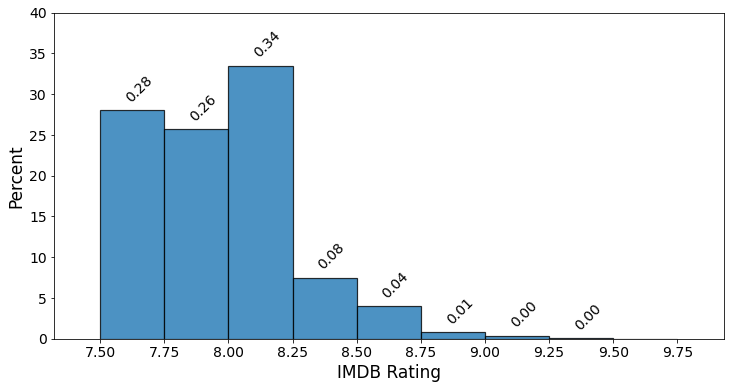

In [ ]:
def plot_ratings():

  #creating intervals bins for the ratings
  rating_bins = np.arange(7.5,10,0.25) 
  n = imdb["IMDB_Rating"].shape[0]

  #creating the figure
  fig = plt.figure(figsize=(12,6))
  values, bins, _ = plt.hist(imdb["IMDB_Rating"].astype(float), 
                             bins=rating_bins, 
                             color = 'C0', 
                             alpha = 0.8, 
                             edgecolor='black', 
                             linewidth=1.2, 
                             weights=np.ones(n) / n)
  
  #array with bins edges that goes in the xticks

  plt.xticks(rating_bins)
  plt.yticks(np.arange(0, 0.45, 0.05), labels = range(0, 45, 5))

  plt.margins(x=0.08, y = 0.075)
  plt.ylim(0, 0.4)
  plt.xlabel('IMDB Rating')

  for bin, value in zip(bins, values):
    if value > 0:
      plt.text(bin + 0.09, value + 0.01, f'{value:.2f}', rotation = 45)
  
  plt.ylabel('Percent')

plot_ratings()

Devido ao baixo número de registro de filmes por ano, a observação das distribuições de rating não trazem muito informação

# (Giovanni) achei esse gráfico abaixo muito confuso e difícel de interpretar

In [ ]:
fig = px.histogram(imdb.sort_values('Released_Year'), x="IMDB_Rating", animation_frame = 'Released_Year', range_y=[0,10], title = "")
fig.show()

In [ ]:
ratingByGenre = ByGenre(imdb, 'IMDB_Rating')

meanRatingByGenre = pd.DataFrame(reduceDict(ratingByGenre), columns = ['Genre', 'MeanRating'])
meanRatingByGenre['MeanRating'] = meanRatingByGenre['MeanRating'].astype(float)

### Média do IMDb Rating por gênero

In [ ]:
fig = px.bar(x = meanRatingByGenre['Genre'], y =meanRatingByGenre['MeanRating'], range_y=[7.8, 8.1], 
       title = 'Média IMDb Rating por Gênero', labels = {"x":"Gênero", "y":"IMDb Rating"}, template = 'plotly_white')

fig.show()

Interessante perceber que apesar do gênero Drama ser o mais frequente os filmes de Guerra (War) e Faroeste (Western) são os mais bem avaliados na plataforma do IMDb

### Relação entre o Gênero e a Arrecadação (Gross)

Vamos converter a coluna Gross para númerico para que possamos agregar e somar os valores por Gênero.

Além disso, como um filme pode ter mais de um gênero e o número máximo de gêneros para um mesmo filme é três, vamos a coluna Genre em três colunas Genre01, Genre02 e Genre03

In [ ]:
imdb_02[["Genre01", "Genre02", "Genre03"]] = imdb_02["Genre"].str.split(', ',3,expand=True).fillna(value=np.nan)

#filling NaN genre columns with the precious value 

imdb_02.loc[imdb_02["Genre02"].isnull(), ["Genre02"]] = imdb_02["Genre01"]
imdb_02.loc[imdb_02["Genre03"].isnull(), ["Genre03"]] = imdb_02["Genre01"]

#grouping by genre 

imdb_by_genre1 = imdb_02.groupby("Genre01")
imdb_by_genre2 = imdb_02.groupby("Genre02")
imdb_by_genre3 = imdb_02.groupby("Genre03")

agg_genre1 = imdb_by_genre1.sum()
agg_genre2 = imdb_by_genre2.sum()
agg_genre3 = imdb_by_genre3.sum()

ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp = final_genre.reset_index()

#renaming 
genre_temp.rename(columns = {"index":"Genre"}, inplace=True)

#striping white spaces from Genre strings
genre_temp["Genre"] = genre_temp["Genre"].str.strip()

#adding the genre count to the aggregated df 
genre_count_dict = dict(zip(genre_df.Genre, genre_df.Count))
genre_temp["Count"] = genre_temp["Genre"].map(genre_count_dict)

genre_temp.head().sort_values(by="Gross", ascending=False)

,Genre,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Count
1,Adventure,408849.0,25919.0,1630.7,14490.0,86454989.0,2.923207e+10,196
0,Action,409578.0,26046.0,1631.7,12402.0,87384391.0,2.417635e+10,189
4,Comedy,626838.0,34868.0,2486.0,20346.0,68684620.0,1.511096e+10,233
2,Animation,166155.0,8238.0,658.1,6155.0,22003859.0,8.574018e+09,82
3,Biography,241845.0,16200.0,960.8,8284.0,30751709.0,5.896184e+09,109


Podemos perceber após agregar e somar os dados que os gêneros de Aventura e Comédia possuem as maiores arrecadações.

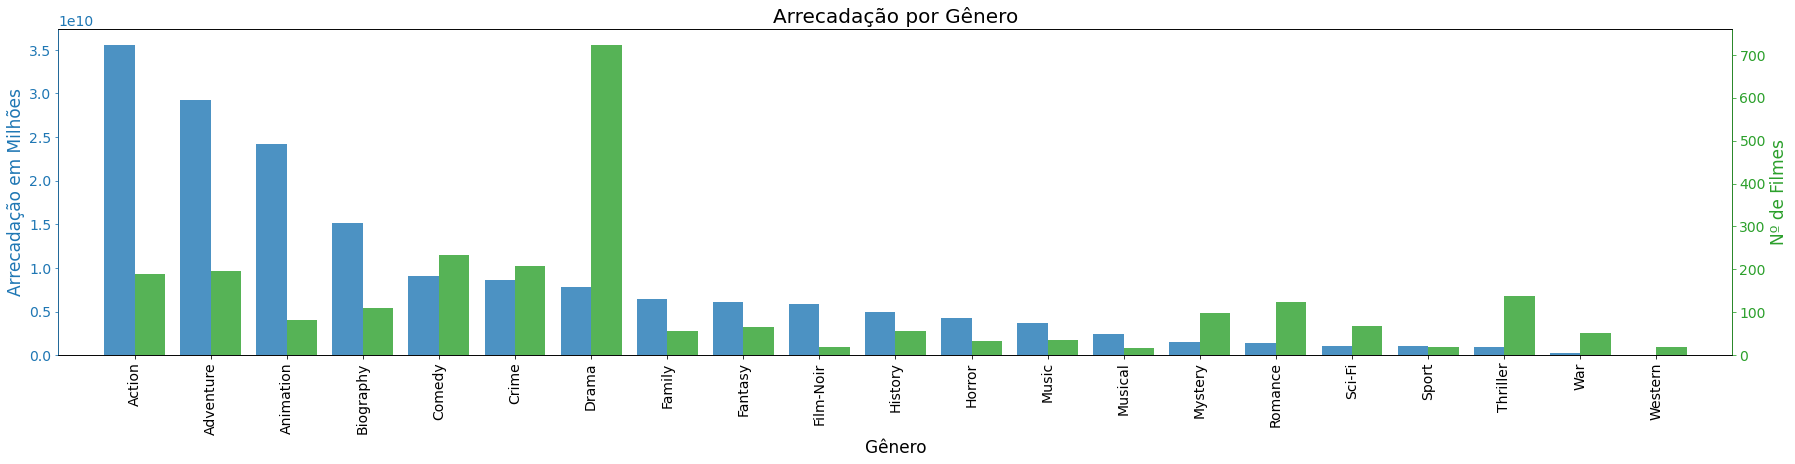

In [ ]:
fig = plt.figure(figsize = (30, 6)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

genre_temp.sort_values('Gross',ascending=False).plot(kind='bar', x= 'Genre', y = 'Gross', color='C0', ax=ax, width=width, position=1, alpha = 0.8, label = 'Gross')
genre_temp.plot(kind='bar', x= 'Genre', y = 'Count', color='C2', ax=ax2, width=width, position=0, alpha = 0.8, label = 'Count')

ax.get_legend().remove()
ax2.get_legend().remove()

ax.set_ylabel('Arrecadação em Milhões', color = 'C0')
ax2.set_ylabel('Nº de Filmes', color = 'C2')

ax2.spines['left'].set_color('C0')
ax2.spines['right'].set_color('C2')

ax.tick_params(axis='y', colors='C0')
ax2.tick_params(axis='y', colors='C2')

plt.xlim(-1, 21)

ax.set_xlabel("Gênero")
plt.title("Arrecadação por Gênero", fontsize=20)

plt.show()

Os gêneros mais produzidos ao longo dos anos não são os gêneros com a maior arrecadação bruta. Desse modo, caso o objetivo da produção seja uma maior arrecadação, vale a pena investir em filmes de Ação, Aventura ou Animação.

## Distribuição dos Filmes por duração

Usaremos a regra da raiz para determinar o número de intervalos que nosso Histogrma deve conter. 

Ela é definida do seguinte modo:

$k=\lceil {\sqrt {n}}\rceil $

onde $n$ é o tamanho da nossa amostra.




Duração Média (min): 122.89
Mediana da duração (min): 119.0



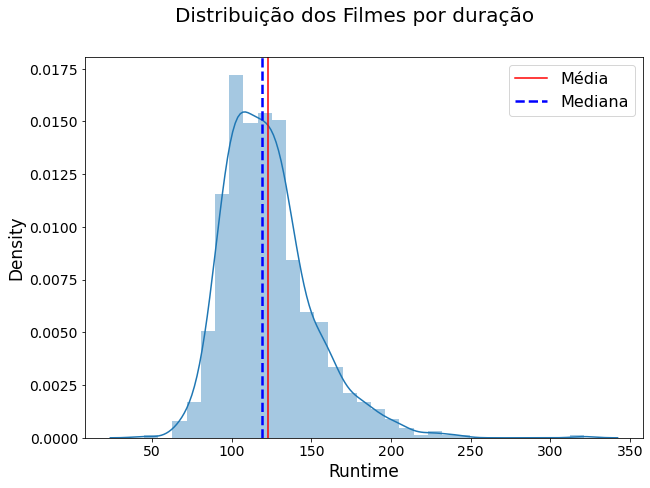

In [ ]:
plt.figure(figsize=(10,7), facecolor='white')

print("Duração Média (min):", round(imdb_02["Runtime"].mean(),2))
print("Mediana da duração (min):", round(imdb_02["Runtime"].median(),2))
print()

sns.distplot(imdb_02["Runtime"], bins = math.trunc(np.sqrt(imdb.shape[0])),kde=True)
plt.suptitle("Distribuição dos Filmes por duração", fontsize=20)
plt.axvline(imdb_02["Runtime"].mean(), color="red", label="Média")
plt.axvline(imdb_02["Runtime"].median(), color='blue', ls = '--', lw=2.5, label = "Mediana")
plt.legend()

plt.show()

Os filmes possuem em média uma duração de, aproxidamente, 2h.

E a maioria deles tem duração entre 90 e 130 min

### Duração dos Filmes ao longo dos anos

In [ ]:
movies_Runtime = imdb[["Released_Year", "Runtime"]].sort_values(by="Released_Year", ascending=True)
mean_Runtime_10y = movies_Runtime["Runtime"].rolling(window=10, min_periods=10).mean()


fig = px.line(movies_Runtime, x='Released_Year', y="Runtime", title = "Duração dos Filmes ao longo dos anos", template="plotly_white")
fig.add_scatter(x = movies_Runtime["Released_Year"], y = mean_Runtime_10y, name = "MMA(10)")
fig.show()

Percebemos que a média de duração dos Filmes **até meados da década de 1950 dificilmente ultrapassava os 120 minutos**. E, apartir da década de 60, a maioria dos filmes passou a ter uma duração entre 120 e 130 minutos.

## Relação entre a presença de determinado Ator e a Arrecadação

In [ ]:
actor_Rev = imdb.sort_values(by="Gross", ascending=False)[:10]
values = actor_Rev.Gross.values

#with subplots
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=["Stars 1", "Stars 2", "Stars 3", "Stars 4"])

#subplot (1,1)
labels1 = actor_Rev.Star1.values
fig.add_trace(go.Pie(values=values, labels=labels1),1,1)

#subplot (1,2)
labels2 = actor_Rev.Star2.values
fig.add_trace(go.Pie(values=values, labels=labels2),1,2)

#subplot (2,1)
labels3 = actor_Rev.Star3.values
fig.add_trace(go.Pie(values=values, labels=labels3),2,1)

#subplot (2,2)
labels4 = actor_Rev.Star4.values
fig.add_trace(go.Pie(values=values, labels=labels4),2,2)

fig.update_traces(textposition='inside', textinfo='percent+label',showlegend=False)
fig.update_layout(
    title_text="Estrelas presentes nos 10 filmes com maiores arrecadações"
)

fig['layout'].update(height=1200, width=1200)
go.FigureWidget(fig)

fig.show()

Interessante observar que o ator **Robert Downey Jr** esteve em dois dos filmes com as maiores arrecadações do IMDb

In [ ]:
fig = px.bar(actor_Rev,x='Star1',y='Gross',color='No_of_Votes',
       hover_name='Series_Title', text='IMDB_Rating', template='plotly_white', title = "Arrecadação em Bi e Nº de Votos para as Top Estrelas")

fig.show()

Perceba que o Número de Votos na plataforma não parece se relacionar diretamente com a Arrecadação (Gross). Vemos que **The Dark Knight** o top 3 na lista do IMDb teve uma baixa arrecadação apesar de apresentar um altíssimo número de votos

## Atores/Atrizes e Número de Votos

In [ ]:
fig = px.bar(movies_Votes,x='Star1',y='No_of_Votes',color='Gross',
       hover_name='Series_Title',text='IMDB_Rating',template='plotly_white',
      title='Atores/Atrizes mais votados')

fig.show()

Perceba que os **atores ou atrizes com o maior número de votos** na plataforma correspondem **aqueles presentes nos filmes mais bem avaliados** do IMDb. Desse modo, recebem mais votos aqueles que atuaram nos filmes mais bem classificados.

# (Giovanni) Jogar essa função e a saida dela mais para o inicio

In [ ]:
def topN(n:int):
  topN = imdb.sort_values(by="IMDB_Rating", ascending=False).head(n)

  topN = topN.iloc[:,[0,1,4,5]]

  return topN

topN(10)

,Series_Title,Released_Year,Genre,IMDB_Rating
0,The Shawshank Redemption,1994.0,Drama,9.3
1,The Godfather,1972.0,"Crime, Drama",9.2
2,The Dark Knight,2008.0,"Action, Crime, Drama",9.0
3,The Godfather: Part II,1974.0,"Crime, Drama",9.0
4,12 Angry Men,1957.0,"Crime, Drama",9.0
5,The Lord of the Rings: The Return of the King,2003.0,"Action, Adventure, Drama",8.9
6,Pulp Fiction,1994.0,"Crime, Drama",8.9
7,Schindler's List,1993.0,"Biography, Drama, History",8.9
10,The Lord of the Rings: The Fellowship of the Ring,2001.0,"Action, Adventure, Drama",8.8
11,Forrest Gump,1994.0,"Drama, Romance",8.8


## Arrecadação (Gross)

Vamos converter a coluna `Gross` para float para que possamos realizar operações matemáticas com os números

In [ ]:
def plotTotalGross():

  totalGross = imdb.groupby("Released_Year")["Gross"].sum().reset_index()
  totalGross = totalGross.iloc[:-1,:]
  totalGross.rename(columns={"Gross":"Total Gross", "Released_Year":"Year"}, inplace=True)

  #plotting the total gross per year
  fig = px.line(totalGross, x='Year', y="Total Gross", title = "Arrecadação Total por Ano", template = 'plotly_white')
  fig.show()

  return

plotTotalGross()

Perceba que a arrecadação cresceu conjuntamente com o aumento do número de filmes anuais por volta da década de 90. 

In [ ]:
grossByGenre = ByGenre(imdb[['Genre', 'Gross']].dropna(), 'Gross')

meanGrossByGenre = pd.DataFrame(reduceDict(grossByGenre), columns = ['Genre', 'MeanGross'])
meanGrossByGenre['MeanGross'] = meanGrossByGenre['MeanGross'].astype(float)

### Correlação entre o Rating e o Gross

In [ ]:
gross_rating = imdb[["IMDB_Rating", "Gross"]]

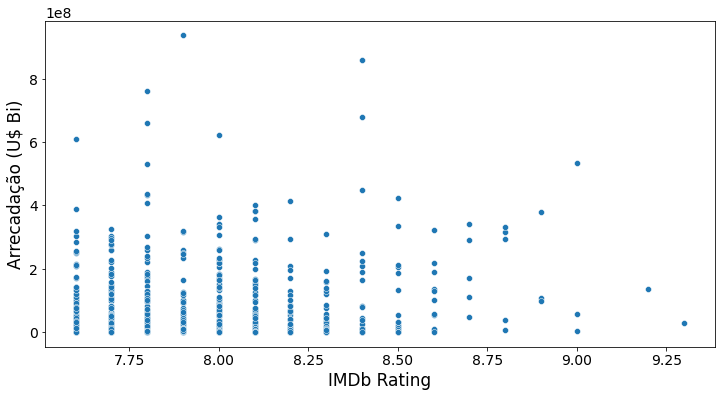

In [ ]:
fig = plt.figure(figsize=(12,6))

sns.scatterplot(x = "IMDB_Rating", y = "Gross", data = gross_rating)
# plt.title("Arrecadação por IMDb Rating", fontsize=20)
plt.xlabel("IMDb Rating")
plt.ylabel("Arrecadação (U$ Bi)")

plt.show()

## Arrecadação e Diretores

In [ ]:
def top_directors(n=imdb.shape[0]):
  top_directors = imdb.groupby('Director')["Gross"].sum().reset_index()
  top_directors = top_directors.sort_values('Gross', ascending=False)[:n]

  return top_directors

In [ ]:
directors_gross_rating = imdb.iloc[:,[0,5,8]]

#director and total gross dict 
director_total_gross = dict(zip(top_directors().Director, top_directors().Gross))

#adding the column Director Gross to the df 
directors_gross_rating["Director_Gross"] = directors_gross_rating.Director.map(director_total_gross)

directors_gross_rating.head(10).sort_values(by="Director_Gross", ascending=False)


,Series_Title,IMDB_Rating,Director,Director_Gross
7,Schindler's List,8.9,Steven Spielberg,2.478133e+09
2,The Dark Knight,9.0,Christopher Nolan,1.937454e+09
8,Inception,8.8,Christopher Nolan,1.937454e+09
5,The Lord of the Rings: The Return of the King,8.9,Peter Jackson,1.597312e+09
6,Pulp Fiction,8.9,Quentin Tarantino,7.270343e+08
9,Fight Club,8.8,David Fincher,7.133145e+08
1,The Godfather,9.2,Francis Ford Coppola,3.468240e+08
3,The Godfather: Part II,9.0,Francis Ford Coppola,3.468240e+08
0,The Shawshank Redemption,9.3,Frank Darabont,1.651428e+08
4,12 Angry Men,9.0,Sidney Lumet,1.381600e+08


In [ ]:
fig = px.bar(directors_gross_rating.head(10),x='Director',y='Director_Gross',hover_name='Series_Title',color = 'IMDB_Rating',
       template='plotly_white', title='Top Diretores e Arrecadação por IMDb Rating')

fig.show()

Perceba que **Frank Darabont** o diretor de **The Shawshank Redemption**, o filme mais bem avaliado na plataforma não apresenta uma arrecadação acumulada que se assemelhe à avaliação do título. Também não podemos dizer que o ano de lançamento foi um fator decisivo para isso, pois "Schindler's List" lançado em 1993, um ano antes, apresentou arrecadação muito maior.

# Conclusão

# **6 - Referências**
---